In [203]:
#import libraries
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
#Load the dataset
covid = pd.read_csv("/Users/meghabatra/Downloads/Provisional_COVID-19_Death_Counts_in_the_United_States_by_County.csv")
covid

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
0,11/17/2021,01/01/2020,11/13/2021,AK,Aleutians East Borough,2013,Noncore,NaN,15.0,One or more data cells have counts between 1-9...
1,11/17/2021,01/01/2020,11/13/2021,AK,Anchorage Municipality,2020,Medium metro,454.0,4475.0,NaN
2,11/17/2021,01/01/2020,11/13/2021,AK,Bethel Census Area,2050,Noncore,18.0,202.0,NaN
3,11/17/2021,01/01/2020,11/13/2021,AK,Denali Borough,2068,Noncore,NaN,12.0,One or more data cells have counts between 1-9...
4,11/17/2021,01/01/2020,11/13/2021,AK,Dillingham Census Area,2070,Noncore,NaN,48.0,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...
3033,11/17/2021,01/01/2020,11/13/2021,WY,Sweetwater County,56037,Micropolitan,81.0,656.0,NaN
3034,11/17/2021,01/01/2020,11/13/2021,WY,Teton County,56039,Micropolitan,13.0,173.0,NaN
3035,11/17/2021,01/01/2020,11/13/2021,WY,Uinta County,56041,Micropolitan,16.0,269.0,NaN
3036,11/17/2021,01/01/2020,11/13/2021,WY,Washakie County,56043,Noncore,24.0,154.0,NaN


In [205]:
#Shape of the dataset
covid.shape

(3038, 10)

In [206]:
#Concise summary of the dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date as of                 3038 non-null   object 
 1   Start Date                 3038 non-null   object 
 2   End Date                   3038 non-null   object 
 3   State                      3038 non-null   object 
 4   County name                3038 non-null   object 
 5   FIPS County Code           3038 non-null   int64  
 6   Urban Rural Code           3038 non-null   object 
 7   Deaths involving COVID-19  2495 non-null   float64
 8   Deaths from All Causes     3037 non-null   float64
 9   Footnote                   543 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 237.5+ KB


In [207]:
#Check for null values
covid.isnull().sum()

Date as of                      0
Start Date                      0
End Date                        0
State                           0
County name                     0
FIPS County Code                0
Urban Rural Code                0
Deaths involving COVID-19     543
Deaths from All Causes          1
Footnote                     2495
dtype: int64

In [208]:
#General Desciptive Statistics 
covid.describe(include = "all")

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
count,3038,3038,3038,3038,3038,3038.000000,3038,2495.000000,3037.000000,543
unique,1,1,1,51,1816,NaN,6,NaN,NaN,1
top,11/17/2021,01/01/2020,11/13/2021,TX,Washington County,NaN,Noncore,NaN,NaN,One or more data cells have counts between 1-9...
freq,3038,3038,3038,245,30,NaN,1256,NaN,NaN,543
mean,NaN,NaN,NaN,NaN,NaN,30394.437130,NaN,305.882966,2048.639447,NaN
std,NaN,NaN,NaN,NaN,NaN,15138.612626,NaN,943.554932,5805.518669,NaN
min,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,10.000000,12.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,18179.500000,NaN,24.000000,210.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29144.000000,NaN,59.000000,488.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,45078.500000,NaN,225.000000,1459.000000,NaN


Deaths involving COVID-19 column has 543 null values. So, I have replaced it with 0

In [209]:
covid["Deaths involving COVID-19"] = covid["Deaths involving COVID-19"].fillna(0)
covid["Deaths from All Causes"] = covid["Deaths from All Causes"].fillna(0)
covid

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
0,11/17/2021,01/01/2020,11/13/2021,AK,Aleutians East Borough,2013,Noncore,0.0,15.0,One or more data cells have counts between 1-9...
1,11/17/2021,01/01/2020,11/13/2021,AK,Anchorage Municipality,2020,Medium metro,454.0,4475.0,NaN
2,11/17/2021,01/01/2020,11/13/2021,AK,Bethel Census Area,2050,Noncore,18.0,202.0,NaN
3,11/17/2021,01/01/2020,11/13/2021,AK,Denali Borough,2068,Noncore,0.0,12.0,One or more data cells have counts between 1-9...
4,11/17/2021,01/01/2020,11/13/2021,AK,Dillingham Census Area,2070,Noncore,0.0,48.0,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...
3033,11/17/2021,01/01/2020,11/13/2021,WY,Sweetwater County,56037,Micropolitan,81.0,656.0,NaN
3034,11/17/2021,01/01/2020,11/13/2021,WY,Teton County,56039,Micropolitan,13.0,173.0,NaN
3035,11/17/2021,01/01/2020,11/13/2021,WY,Uinta County,56041,Micropolitan,16.0,269.0,NaN
3036,11/17/2021,01/01/2020,11/13/2021,WY,Washakie County,56043,Noncore,24.0,154.0,NaN


Exploratory Data Analysis

In [210]:
#States v/s Number of deaths involving covid-19
data = covid.groupby("State")["Deaths involving COVID-19"].sum().reset_index()
data
sort = data.sort_values(by="Deaths involving COVID-19", ascending = False)
sort

,State,Deaths involving COVID-19
43,TX,76999.0
4,CA,76632.0
34,NY,58753.0
9,FL,58707.0
38,PA,33338.0
35,OH,28964.0
31,NJ,26452.0
10,GA,25952.0
14,IL,25647.0
22,MI,21650.0


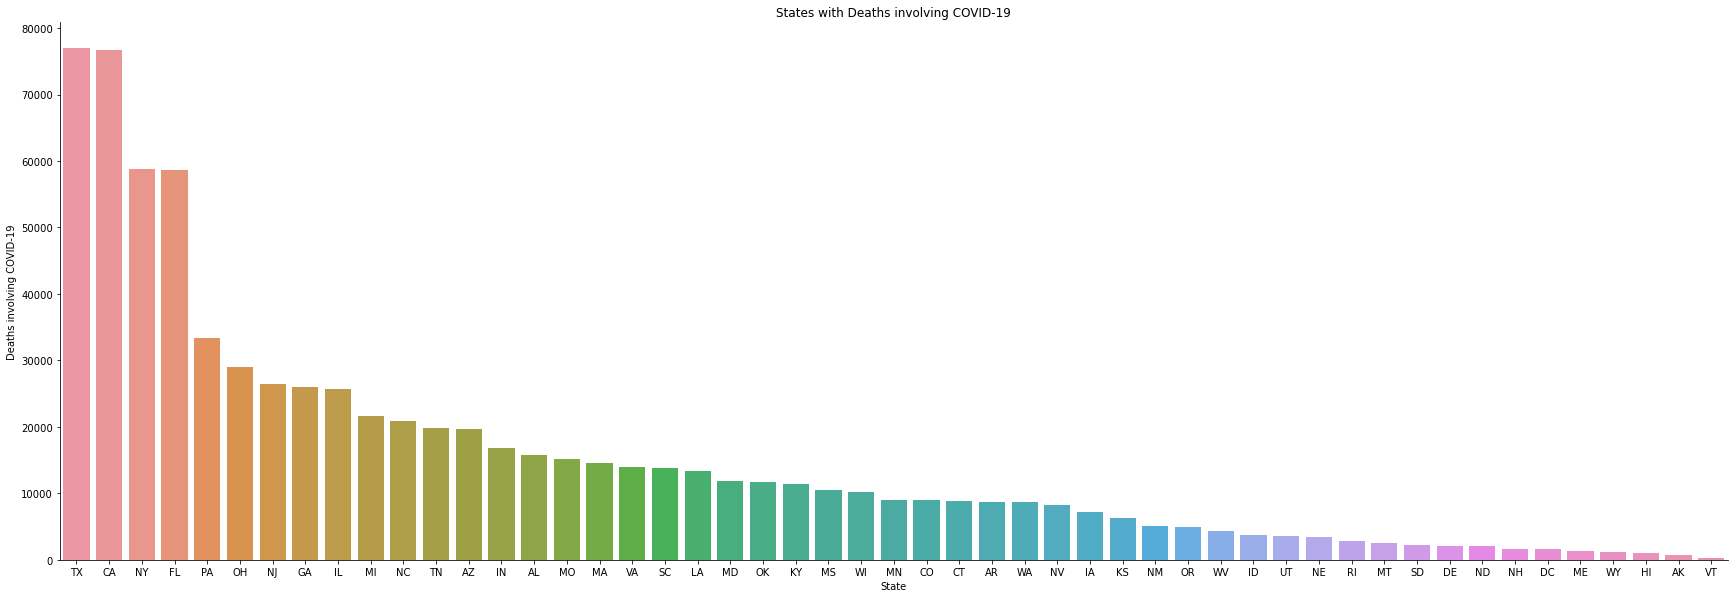

In [211]:
#Bar plot states v/s deaths involving covid-19
ax = sns.catplot(x="State",
                 y="Deaths involving COVID-19",
                 kind="bar", 
                 data=sort, height = 8,aspect = 3, legend = True).set(title='States with Deaths involving COVID-19')

In [212]:
#Treemap showing state v/s deaths involving covid-19
fig=px.treemap(sort, path=['State', "Deaths involving COVID-19"])
fig.show()
#fig = px.treemap(sort,path = ["Country or Region"])

In [213]:
##States v/s Number of deaths from all causes
data1 = covid.groupby("State")["Deaths from All Causes"].sum().reset_index()
data1
sort1= data1.sort_values(by = "Deaths from All Causes" , ascending = False)
sort1

,State,Deaths from All Causes
4,CA,599930.0
43,TX,480869.0
9,FL,470373.0
34,NY,353340.0
38,PA,283358.0
35,OH,260734.0
14,IL,229053.0
22,MI,208406.0
10,GA,195274.0
27,NC,188607.0


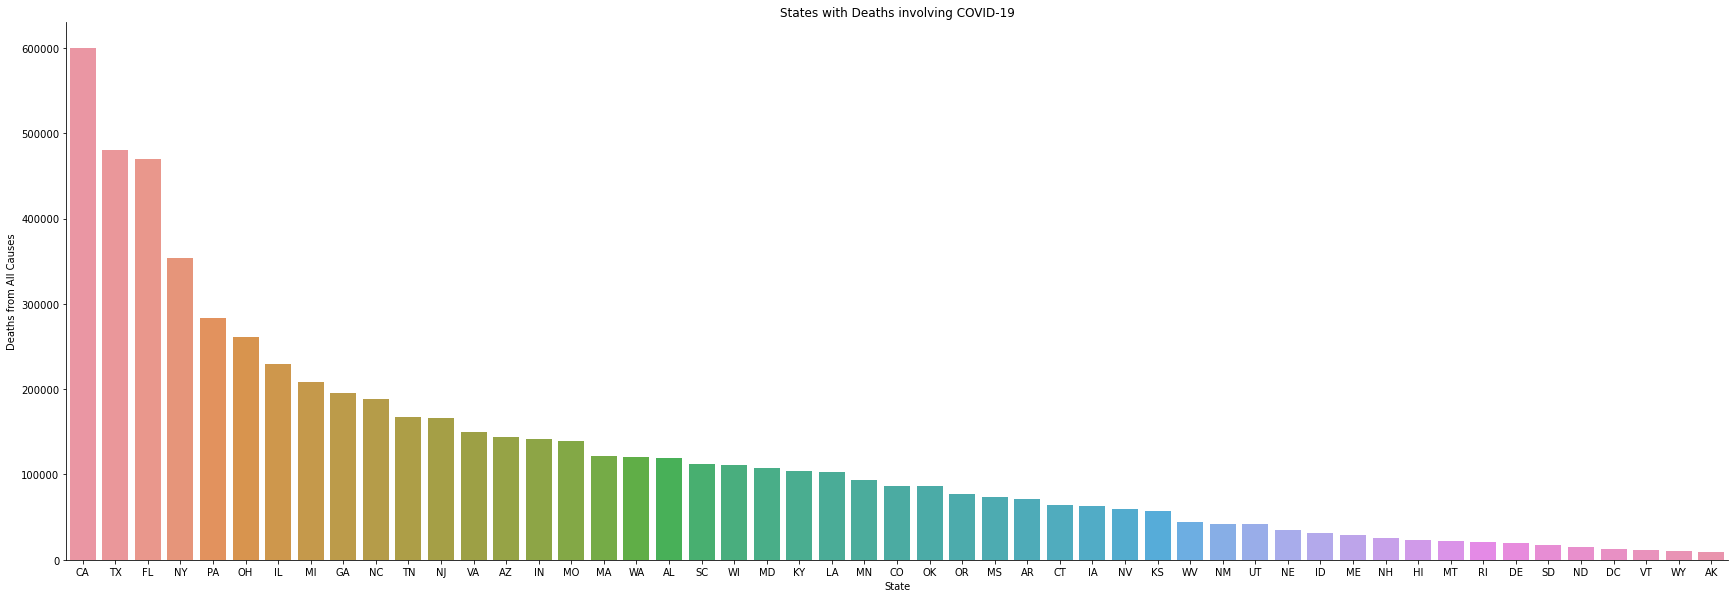

In [214]:
#Bar plot state v/s Deaths from All Causes 
ax = sns.catplot(x="State",
                 y="Deaths from All Causes",
                 kind="bar", 
                 data=sort1, height = 8,aspect = 3, legend = True).set(title='States with Deaths involving COVID-19')

In [215]:
#Treemap showing state v/s deaths from all causes
fig=px.treemap(sort1, path=['State', "Deaths from All Causes"])
fig.show()

In [216]:
#Merging two data frames
data2 = pd.merge(data, data1,how="inner", on="State")
data2
data2["Deaths from Causes other than COVID-19"] = data2["Deaths from All Causes"] - data2["Deaths involving COVID-19"]
data2

,State,Deaths involving COVID-19,Deaths from All Causes,Deaths from Causes other than COVID-19
0,AK,780.0,9074.0,8294.0
1,AL,15711.0,119883.0,104172.0
2,AR,8670.0,71257.0,62587.0
3,AZ,19686.0,144297.0,124611.0
4,CA,76632.0,599930.0,523298.0
5,CO,8942.0,86819.0,77877.0
6,CT,8824.0,64423.0,55599.0
7,DC,1616.0,13229.0,11613.0
8,DE,2091.0,20154.0,18063.0
9,FL,58707.0,470373.0,411666.0


In [217]:
fig=px.treemap(data2, path=['State',"Deaths from All Causes","Deaths from Causes other than COVID-19","Deaths involving COVID-19"])
fig.show()

In [218]:
fig2 = px.bar(data2.iloc[0:20],
      y='State',
      x=["Deaths involving COVID-19","Deaths from Causes other than COVID-19"],
      template='plotly_dark',
      title='Severly Hit States')
fig2.update_xaxes(tickangle=270)
fig2.show()

California has maximum number of Deaths due to COVID-19, followed by Florida.

In [219]:
#Pie plot of the total deaths in 20 states
px.pie(data2.iloc[0:20],
       names='State',
       values='Deaths from All Causes',
      template='plotly_dark',
      title='Distribution of Total Deaths in 20 states ')

In [220]:
#Zones affected due to COVID-19
covid["Urban Rural Code"].value_counts()

Noncore                1256
Micropolitan            625
Medium metro            371
Large fringe metro      366
Small metro             352
Large central metro      68
Name: Urban Rural Code, dtype: int64

In [221]:
#Zones affected due to COVID-19
data3 = covid.groupby("Urban Rural Code")["Deaths involving COVID-19"].sum().reset_index()
sort = data3.sort_values(by = "Deaths involving COVID-19", ascending = False)
sort

,Urban Rural Code,Deaths involving COVID-19
0,Large central metro,248724.0
2,Medium metro,173496.0
1,Large fringe metro,162637.0
5,Small metro,86605.0
3,Micropolitan,63311.0
4,Noncore,28405.0


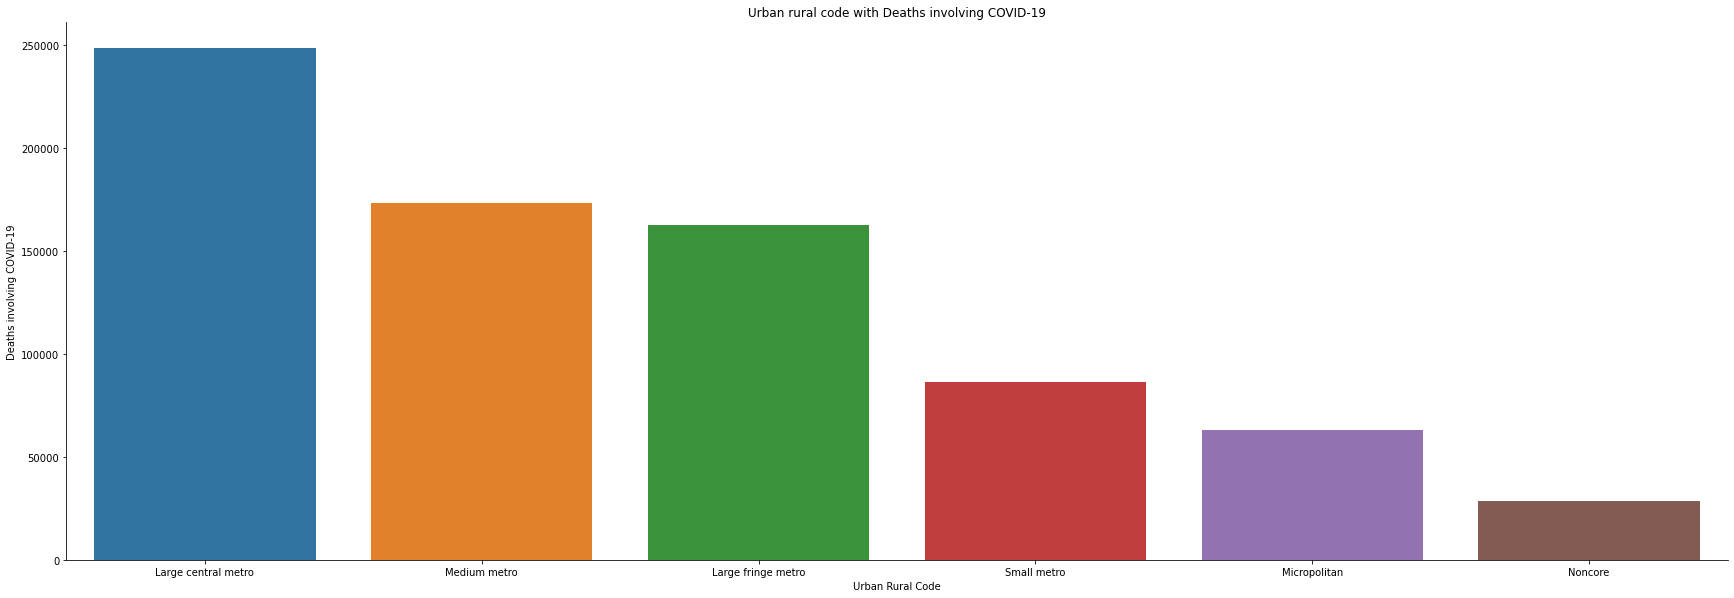

In [222]:
#Plot to display Urban rural codes vs deaths due to covid-19
ax = sns.catplot(x="Urban Rural Code",
                 y="Deaths involving COVID-19",
                 kind="bar", 
                 data=sort, height = 8,aspect = 3, legend = True).set(title='Urban rural code with Deaths involving COVID-19')

Large Central Metro is the worst affected Zone by COVID-19 with maximum number of Deaths due to COVID-19

In [223]:
#Zones affected due to COVID-19
data4 = covid.groupby("Urban Rural Code")["Deaths from All Causes"].sum().reset_index()
sort = data4.sort_values(by = "Deaths from All Causes", ascending = False)
sort

,Urban Rural Code,Deaths from All Causes
0,Large central metro,1803651.0
2,Medium metro,1438256.0
1,Large fringe metro,1364746.0
5,Small metro,689415.0
3,Micropolitan,569363.0
4,Noncore,356287.0


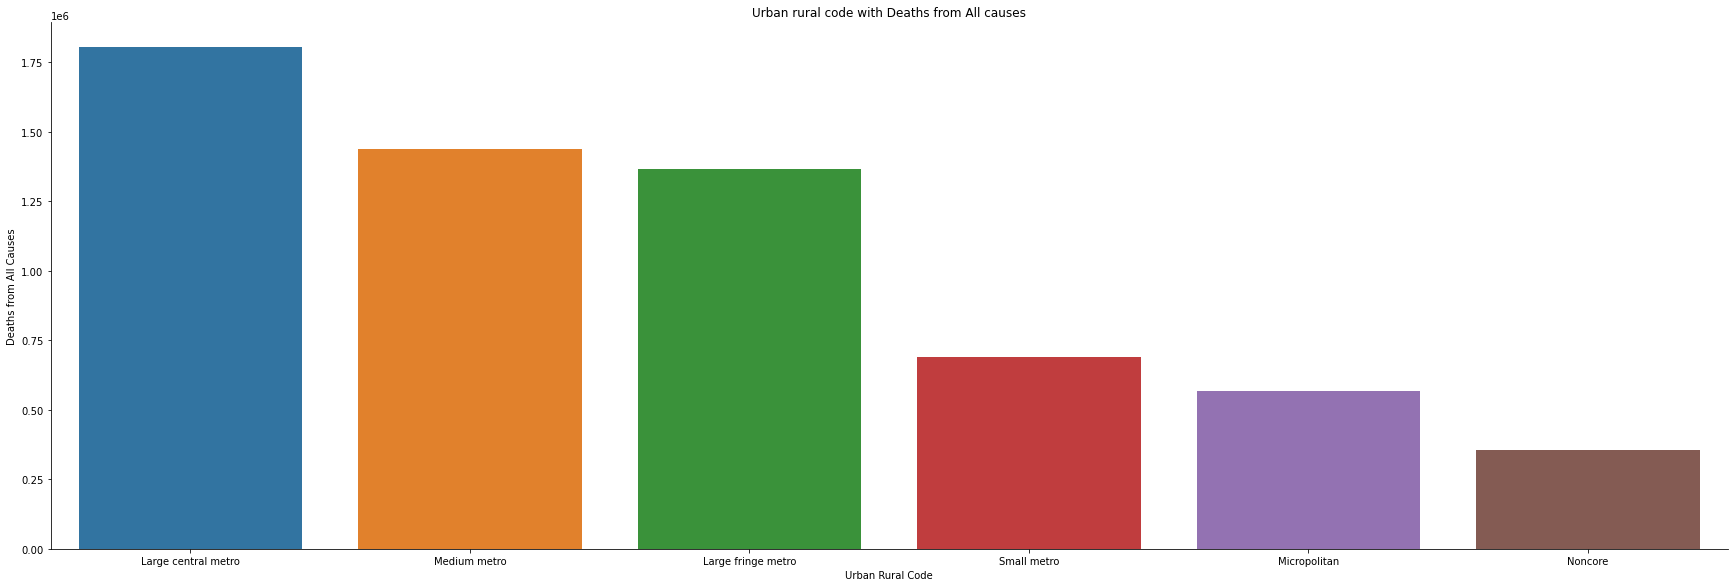

In [224]:
#Plot to display Urban rural codes vs deaths due to all causes 
ax = sns.catplot(x="Urban Rural Code",
                 y="Deaths from All Causes",
                 kind="bar", 
                 data=sort, height = 8,aspect = 3, legend = True).set(title="Urban rural code with Deaths from All causes")

Here I have divided the states into divisions based on the location and area. 

In [191]:
covid['State'].unique()
def f(row):
    if row['State'] in ['CT','ME','MA','NH','RI', 'VT']:
        return 'New England'
    elif row['State'] in ['NJ','NY','PA']:
        return 'Middle Atlantic'
    elif row['State'] in ['IN','IL','MI','OH','WI']:
        return 'East North Central'
    elif row['State'] in ['IA','NE','KS','ND','MN','SD','MO']:
        return 'West North Central'
    elif row['State'] in ['DE','DC','FL','GA','MD','NC','SC','VA','WV']:
        return 'South Atlantic'
    elif row['State'] in ['AL','KY','MS','TN']:
        return 'East South Central'
    elif row['State'] in ['AR','LA','OK','TX']:
        return 'West South Central'
    elif row['State'] in ['AR','CO','ID','NM','MT','UT','NV','WY']:
        return 'Mountain'
    else:
        return 'Pacific'
    

covid['Division'] = covid.apply(f, axis=1)
covid.head(30)

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote,Division
0,11/17/2021,01/01/2020,11/13/2021,AK,Aleutians East Borough,2013,Noncore,0.0,15.0,One or more data cells have counts between 1-9...,Pacific
1,11/17/2021,01/01/2020,11/13/2021,AK,Anchorage Municipality,2020,Medium metro,454.0,4475.0,NaN,Pacific
2,11/17/2021,01/01/2020,11/13/2021,AK,Bethel Census Area,2050,Noncore,18.0,202.0,NaN,Pacific
3,11/17/2021,01/01/2020,11/13/2021,AK,Denali Borough,2068,Noncore,0.0,12.0,One or more data cells have counts between 1-9...,Pacific
4,11/17/2021,01/01/2020,11/13/2021,AK,Dillingham Census Area,2070,Noncore,0.0,48.0,One or more data cells have counts between 1-9...,Pacific
5,11/17/2021,01/01/2020,11/13/2021,AK,Fairbanks North Star Borough,2090,Small metro,123.0,1064.0,NaN,Pacific
6,11/17/2021,01/01/2020,11/13/2021,AK,Hoonah-Angoon Census Area,2105,Noncore,0.0,27.0,One or more data cells have counts between 1-9...,Pacific
7,11/17/2021,01/01/2020,11/13/2021,AK,Juneau City and Borough,2110,Micropolitan,0.0,323.0,One or more data cells have counts between 1-9...,Pacific
8,11/17/2021,01/01/2020,11/13/2021,AK,Kenai Peninsula Borough,2122,Noncore,47.0,750.0,NaN,Pacific
9,11/17/2021,01/01/2020,11/13/2021,AK,Ketchikan Gateway Borough,2130,Micropolitan,10.0,184.0,NaN,Pacific


In [192]:
#summary based on division 
data5 = covid.groupby("Division")["Deaths from All Causes"].sum().reset_index()
data5

,Division,Deaths from All Causes
0,East North Central,951547.0
1,East South Central,464696.0
2,Middle Atlantic,802544.0
3,Mountain,294032.0
4,New England,273453.0
5,Pacific,972783.0
6,South Atlantic,1301931.0
7,West North Central,418769.0
8,West South Central,741963.0


In [194]:
#plot to display division vs deaths from all causes
px.bar(data5,
      y='Division',
      x="Deaths from All Causes",
      template='plotly_dark',
      title='Bar plot to show Division vs Death from All Causes')

In [195]:
data6 = covid.groupby("Division")["Deaths involving COVID-19"].sum().reset_index()
data6

,Division,Deaths involving COVID-19
0,East North Central,103235.0
1,East South Central,57397.0
2,Middle Atlantic,118543.0
3,Mountain,33304.0
4,New England,29640.0
5,Pacific,111656.0
6,South Atlantic,153247.0
7,West North Central,45422.0
8,West South Central,110734.0


In [197]:
#plot to display division vs deaths from covid-19
px.bar(data6,
      y='Division',
      x="Deaths involving COVID-19",
      template='plotly_dark',
      title='Bar plot to show Division vs Death from COVID-19')

In [226]:
d = covid.groupby(["State","County name"])["Deaths involving COVID-19"].sum().reset_index()
sort = d.sort_values(by = "Deaths involving COVID-19", ascending = False)
sort1 = sort.head(10)
sort1

,State,County name,Deaths involving COVID-19
191,CA,Los Angeles County,25214.0
166,AZ,Maricopa County,12661.0
682,IL,Cook County,11538.0
2536,TX,Harris County,10649.0
1931,NY,Kings County,8938.0
342,FL,Miami-Dade County,8265.0
1948,NY,Queens County,7800.0
2452,TX,Bexar County,7095.0
202,CA,Orange County,6612.0
208,CA,San Bernardino County,6497.0


In [227]:
#top 10 countries vs deaths due to covid-19
px.bar(sort1,
      y='County name',
      x="Deaths involving COVID-19",
      template='plotly_dark',
      title='Bar plot to show top 10 Counties with the maximum number of Death from Covid-19 count')
#fig2.update_xaxes(tickangle=270)
#fig2.show()

In [229]:
d = covid.groupby(["State","County name"])["Deaths from All Causes"].sum().reset_index()
sort = d.sort_values(by = "Deaths from All Causes", ascending = False)
sort1 = sort.head(10)
sort1

,State,County name,Deaths from All Causes
191,CA,Los Angeles County,152835.0
682,IL,Cook County,91509.0
166,AZ,Maricopa County,85275.0
2536,TX,Harris County,70129.0
342,FL,Miami-Dade County,49180.0
209,CA,San Diego County,48728.0
202,CA,Orange County,46743.0
1895,NV,Clark County,42201.0
1279,MI,Wayne County,39635.0
205,CA,Riverside County,39417.0


In [230]:
px.bar(sort1,
      y='County name',
      x="Deaths from All Causes",
      template='plotly_dark',
      title='Bar plot to show top 10 Counties with the maximum number of Death from All Causes')